In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset_train = pd.read_excel("Stock_Price_data_set.xlsx")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [38]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[262.      ]
 [247.699997]
 [266.579987]
 ...
 [448.25    ]
 [421.440002]
 [407.309998]]
(1009, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set


array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

In [40]:
x_train = []
y_train = []
for i in range(60,1009):
    x_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [41]:
print(x_train.shape)
print(y_train.shape)

(949, 60)
(949,)


In [42]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(949, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [44]:
regressor = Sequential()

regressor.add(LSTM(units= 50 , return_sequences =True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [53]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train , y_train , epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 11s 69ms/step - loss: 0.0020
Epoch 2/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0018
Epoch 3/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0018
Epoch 4/100
30/30 [==============================] - 2s 68ms/step - loss: 0.0019
Epoch 5/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0020
Epoch 6/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0019
Epoch 7/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0020
Epoch 8/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0019
Epoch 9/100
30/30 [==============================] - 2s 68ms/step - loss: 0.0020
Epoch 10/100
30/30 [==============================] - 2s 70ms/step - loss: 0.0018
Epoch 11/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0020
Epoch 12/100
30/30 [==============================] - 3s 85ms/step - loss: 0.0015
Epoch 13/100
30/30 [====

30/30 [==============================] - 3s 102ms/step - loss: 0.0013


In [54]:
dataset_test = pd.read_excel("Stock_Price_data_set.xlsx")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [55]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
                          

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
                         
x_test = []
for i in range(60,1009):
        x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
                         
                        

In [56]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


30/30 [==============================] - 4s 24ms/step


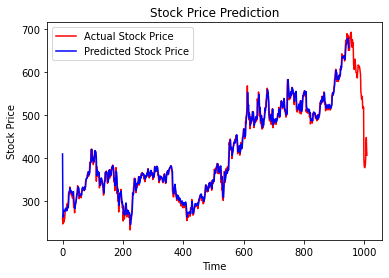

In [57]:
plt.plot(actual_stock_price , color ='red',label='Actual Stock Price')
plt.plot(predicted_stock_price, color ='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()